# PCA y clustering con k-means.

1. A partir de la base de datos Iris, con sus cuatro características, obtenga las dos primeras componentes principales. Representa gráficamente los puntos de datos a partir de las dos componentes principales obtenidas. Puesto que estamos realizando aprendizaje no supervisado , no hace falta que tenga en cuenta las etiquetas de clase.

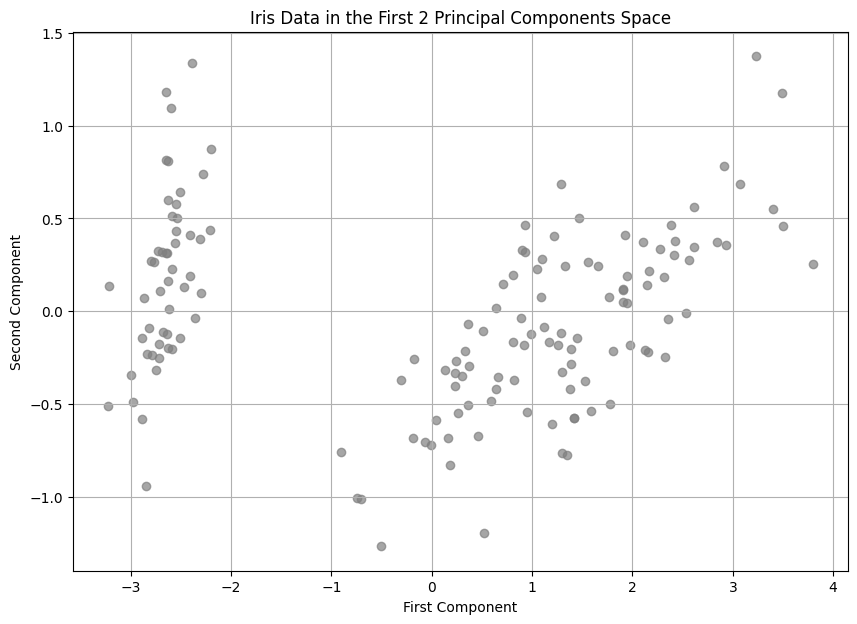

In [44]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data 

pca = PCA(n_components=2) # 2 components
X_pca = pca.fit_transform(X)

variables = ['component_1', 'component_2']
df_pca = pd.DataFrame(X_pca, columns=variables)

plt.figure(figsize=(10, 7))
plt.scatter(df_pca['component_1'], df_pca['component_2'], c='gray', alpha=0.7)
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('Iris Data in the First 2 Principal Components Space')
plt.grid()
plt.show()

2. Distribuya los datos en tres clústeres. Represéntalas ahora con colores que indiquen el clúster al que pertenecen.

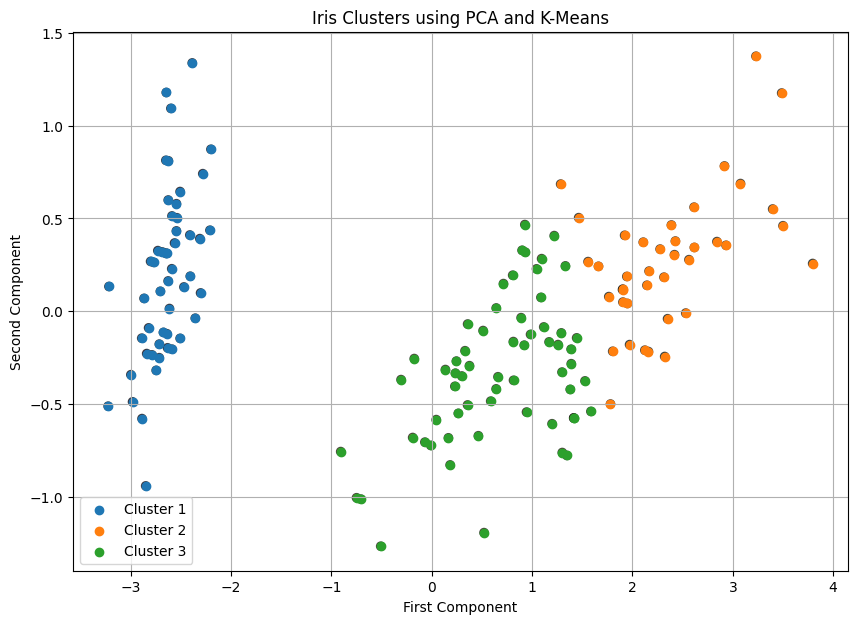

In [45]:
kmeans = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
clusters = kmeans.fit_predict(X_pca)
df_pca['Cluster'] = clusters

plt.figure(figsize=(10, 7))
scatter = plt.scatter(df_pca['component_1'], df_pca['component_2'], c=df_pca['Cluster'], edgecolors='black', cmap='viridis', alpha=0.7)
for cluster in range(3):
	plt.scatter(df_pca[df_pca['Cluster'] == cluster]['component_1'], 
				df_pca[df_pca['Cluster'] == cluster]['component_2'], 
				label=f'Cluster {cluster + 1}')

plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('Iris Clusters using PCA and K-Means')
plt.grid()
plt.legend(loc='best')

plt.show()

# Clustering jerárquico

3. Representa el dendrograma del clustering jerárquico de los mismos datos obtenidos en la pregunta 1.

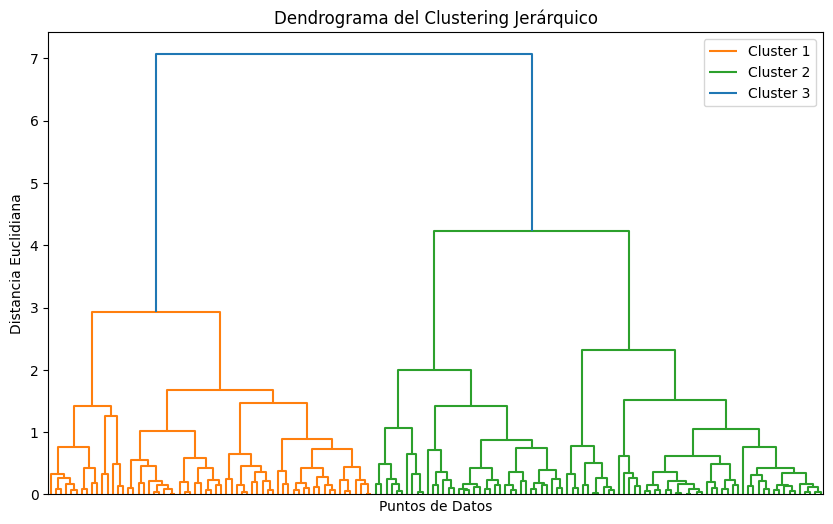

In [50]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(data_pca, method='complete', metric='euclidean')
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3']

plt.figure(figsize=(10, 6))
dendrogram(linked,
			orientation='top',
			distance_sort='ascending',
			show_leaf_counts=True)
plt.title('Dendrograma del Clustering Jerárquico')
plt.xlabel('Puntos de Datos')
plt.ylabel('Distancia Euclidiana')
plt.xticks([])  # Remove x-axis labels -> Remove this line to see the labels
plt.legend(labels, loc='best')
plt.show()

In [47]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 2 2 0 2 0 2 2 0 2 0 2 0 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 0 2 2 2 0 2 2 2 2 2 0 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


# DBSCAN

4. Aplique el algoritmo de clusterización DBSCAN a unos datos con forma de dos círculos concéntricos. Puede guiarse con el siguiente ejemplo.

[Plot Cluster Comparison](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html)

¿El algoritmo logra separar los dos clusters, interior y exterior?

# Cuantización de color

5. El clustering se puede aplicar al procesamiento de imágenes sustituyendo cada valor de color por el centroide más cercano Si se utilizan muchos valores, la imagen procesada será una versión comprimida del original que retendrá mucha fidelidad. se reduce el número de clusters, la distorsión es más evidente a simple vista. En el caso extremo de considerar sólo dos valores, estaríamos codificando cada píxel con sólo un bit, que puede utilizarse para codificar por ejemplo blanco y negro, dos grises o dos colores.

A partir de este código, obtiene cuatro versiones comprimidas de una imagen de su elección. Dos imágenes serán en grises y dos en color. En dos de ellas usa un número elevado de clusters y en la otra un número reducido. Puede utilizar código de los siguientes ejemplos.

[Plot Color Quantization](https://scikit-learn.org/1.5/auto_examples/cluster/plot_color_quantization.html)

[Turn Photos into Cartoons Using Python](https://towardsdatascience.com/turn-photos-into-cartoons-using-python-bb1a9f578a7e)

